<a href="https://colab.research.google.com/github/JoyceZhang0729/EECE571T/blob/main/EECE571T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [12]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('drive/MyDrive/Colab Notebooks/age_gender.csv')

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total rows: 23705
Total columns: 5


In [13]:
## normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = data['age'].value_counts()
ethnicity_dist = data['ethnicity'].value_counts()
gender_dist = data['gender'].value_counts().rename(index={0:'Male',1:'Female'})

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()


In [14]:
X = np.array(data['pixels'].tolist())

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)

y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37
)

Gender Model:

In [15]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


## Stop training when validation loss reach 0.2700
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2700):
            print("\nReached 0.2700 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

In [16]:
history = model.fit(
    X_train, y_train, epochs=20, validation_split=0.1, batch_size=64, callbacks=[callback]
)

Epoch 1/20
260/260 [==============================] - 14s 14ms/step - loss: 0.5285 - accuracy: 0.7370 - val_loss: 0.5836 - val_accuracy: 0.8112
Epoch 2/20
260/260 [==============================] - 3s 12ms/step - loss: 0.4067 - accuracy: 0.8175 - val_loss: 0.4124 - val_accuracy: 0.8372
Epoch 3/20
260/260 [==============================] - 3s 12ms/step - loss: 0.3637 - accuracy: 0.8371 - val_loss: 0.3778 - val_accuracy: 0.8280
Epoch 4/20
260/260 [==============================] - 3s 12ms/step - loss: 0.3392 - accuracy: 0.8501 - val_loss: 0.3549 - val_accuracy: 0.8410
Epoch 5/20
260/260 [==============================] - 3s 13ms/step - loss: 0.3189 - accuracy: 0.8577 - val_loss: 0.3134 - val_accuracy: 0.8637
Epoch 6/20
260/260 [==============================] - 3s 13ms/step - loss: 0.3068 - accuracy: 0.8635 - val_loss: 0.3019 - val_accuracy: 0.8637
Epoch 7/20
260/260 [==============================] - 3s 12ms/step - loss: 0.2984 - accuracy: 0.8703 - val_loss: 0.2939 - val_accuracy: 0.870

2304


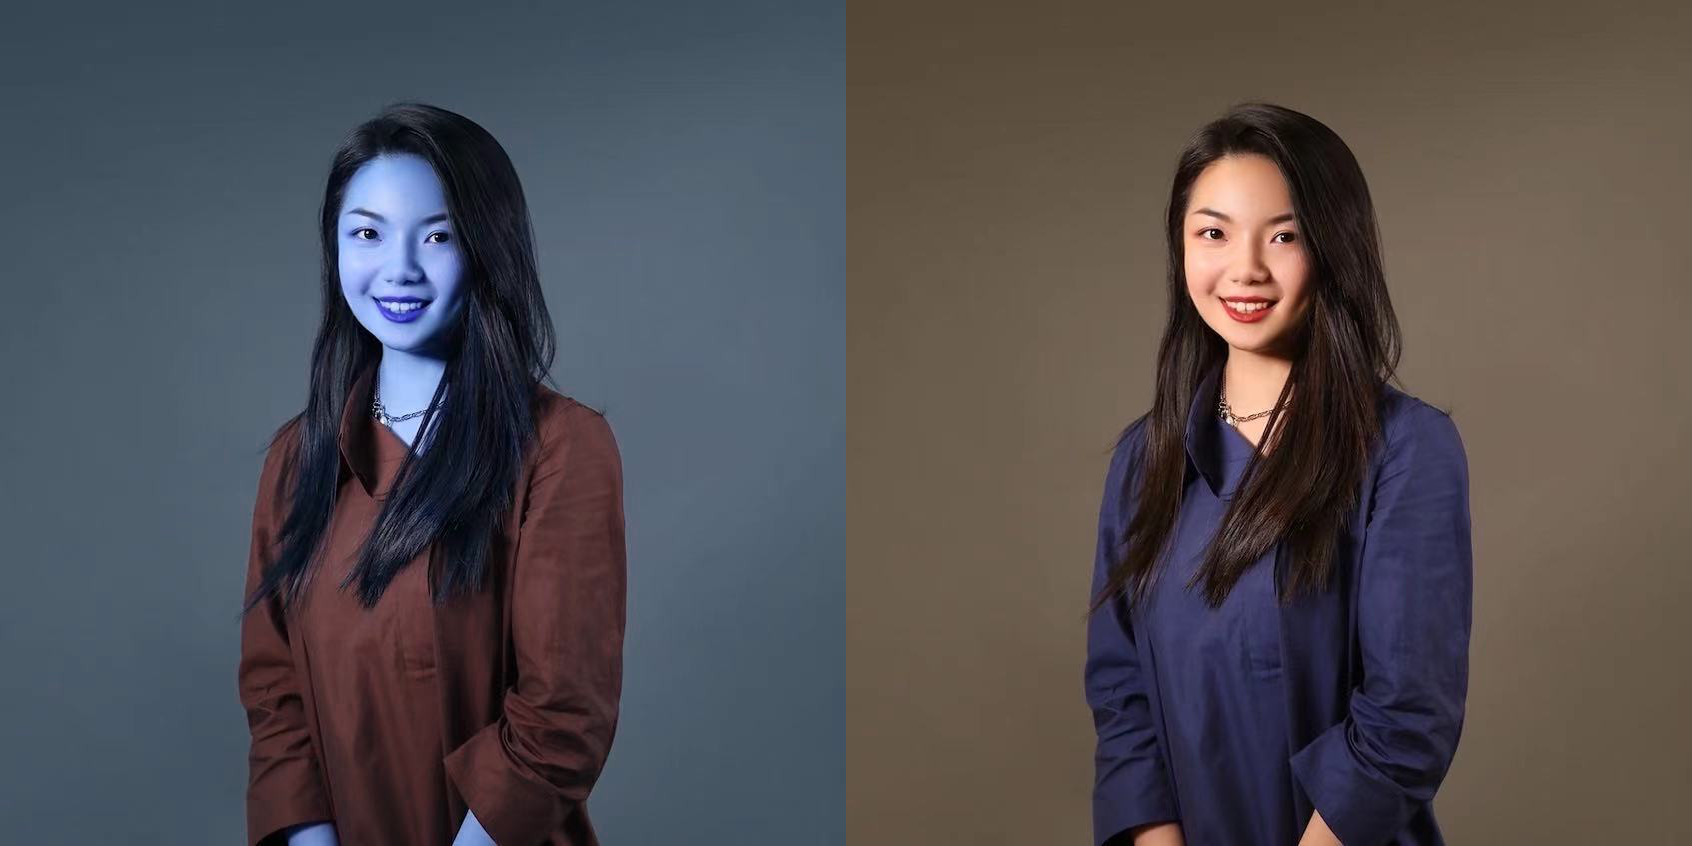

In [17]:
import cv2 as cv
from skimage import io
from google.colab.patches import cv2_imshow
# reads image 'opencv-logo.png' as grayscale
print(len(data['pixels'][0]))
img = io.imread('WechatIMG18444.jpg') 
image_2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img, image_2))
cv2_imshow(final_frame)

In [26]:
new_img=tf.keras.preprocessing.image.load_img('WechatIMG18444.jpg', target_size=(48, 48))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

img_gender = model.predict(img) 

ValueError: ignored